In [67]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline

#класс нейросети
class NeuralNetwork:
    def __init__(self, inputN, hiddenN, outN, learnG):
        #задаем кол-во узлов во входном, скрытом, выходном слое
        self.inputN = inputN
        self.hiddenN = hiddenN
        self.outN = outN
        
#       Матрицы весовых коэффициентов связей wih и who
#       wij, i j коэф связей
        self.wih = numpy.random.normal(0.0, pow(self.hiddenN, -0.5), (self.hiddenN, self.inputN))
        self.who = numpy.random.normal(0.0, pow(self.outN, -0.5), (self.outN, self.hiddenN))
        
#       коэффициент обучаемости
        self.learnG = learnG
    
#       использование сигмоиды в качестве функции активации
        self.activation_function = lambda x: scipy.special.expit(x)
    
    #тренировка нейросети
    def train(self, inputs_list, targets_list):
        # Преобразование списка входных в массив
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # Входящие сигналы для скрытого слоя и исходящие сигналы для скрытого
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #входящие и выходящие сигналы для выходного слоя
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        #ошибки выходного слоя
        output_errors = targets - final_outputs
        
        #ошибки скрытого слоя, распределение пропорционально весовым коэфам
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        #обновить весовые коэфы между скрытым и входным
        self.who += self.learnG * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        #обновить между входным и скрытым
        self.wih += self.learnG * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
    
    #опрос нейросети
    def query(self, inputs_list):
#         Преобразовать список входных в двумерный массив
        inputs = numpy.array(inputs_list, ndmin=2).T
        
#       рассчет входящих и исходящих сигналов для скрытого слоя
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
#         входящие для выходного и исходящие
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
        
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.3

n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

training_data_file = open("mnist_train_100.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

for record in training_data_list:
    # получаем список значений, разделяя запятой
    all_values = record.split(',')
    #масштабирование и смещение входных значений, чтоб не было асимптот
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    #Создать целевые выходные значения. То есть забиваем нулями, кроме желаемого маркерного значения 0.99
    targets = numpy.zeros(output_nodes) + 0.01
    
    #all_values[0] целевое маркерное значение для данной записи
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)

In [49]:
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

learning_rate = 0.3

n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [50]:
n.query([1.0,0.5,-1.5])

array([[0.47393415],
       [0.67173409],
       [0.38895692]])

In [27]:
numpy.random.rand(3,3)

array([[0.47591468, 0.60473523, 0.87717604],
       [0.6317682 , 0.07535429, 0.78365209],
       [0.50042739, 0.8407246 , 0.77756766]])

In [34]:
n.wih

array([[ 0.16812069,  0.41072311, -1.86192332],
       [ 0.32081059,  0.67761905, -1.12429072],
       [ 0.34069753,  1.05941408,  0.82142677]])

In [51]:
data_file = open("mnist_test_10.csv", "r")
data_list = data_file.readlines()
data_file.close()


In [52]:
len(data_list)

10

In [53]:
data_list[0]

'7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,66,14,67,67,67,59,21,236,254,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,253,209,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,233,255,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,254,238,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,249,254,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,254,187,5,0,

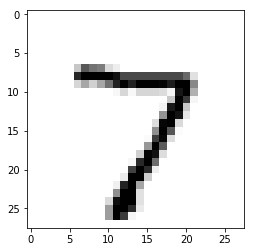

In [58]:
import numpy
import matplotlib.pyplot
%matplotlib inline

all_values = data_list[0].split(',')
#asfarray convert text to numbers array
#reshape create quadro matrix 28x28
#cmap-greys - color only gray

image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [59]:
#конвертируем 0-255 в 0.01-0.99
scailed_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scailed_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [61]:
# количество выходных узлов 10
onnodes = 10
targets = numpy.zeros(onnodes) + 0.01
targets[int(all_values[0])] = 0.99

In [62]:
print(targets)

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01]


In [68]:
test_data_file = open("mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [75]:
all_values = test_data_list[2].split(',')
print(all_values[0])

1


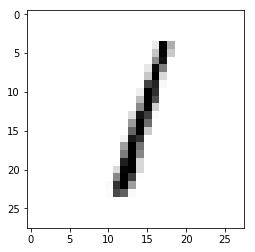

In [76]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [77]:
n.query((numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01)

array([[0.00458418],
       [0.97746106],
       [0.00701107],
       [0.01378393],
       [0.01468392],
       [0.02995   ],
       [0.00859305],
       [0.02545999],
       [0.0664666 ],
       [0.00885355]])

In [80]:
#тестирование нейронной сети
#журнал оценок работы сети
scoreboard = []

# перебираем все записи в тестовом наборе данных
for record in test_data_list:
    #получить список значений из записи, используя запятую в качестве разделителей
    all_values = record.split(',')
    #правильный ответ - первое значение
    correct_label = int(all_values[0])
    print(correct_label, "Истинный маркер")
    
    
    inputs = (numpy.asfarray(all_values[1:])/ 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    
    
    print(label, "ответ сети\n")
    
    #присоединить оценку ответа сети к концу списка
    if(label == correct_label):
        scoreboard.append(1)
    else:
        scoreboard.append(0)
    



7 Истинный маркер
7 ответ сети

2 Истинный маркер
6 ответ сети

1 Истинный маркер
1 ответ сети

0 Истинный маркер
0 ответ сети

4 Истинный маркер
4 ответ сети

1 Истинный маркер
1 ответ сети

4 Истинный маркер
4 ответ сети

9 Истинный маркер
4 ответ сети

5 Истинный маркер
4 ответ сети

9 Истинный маркер
7 ответ сети



In [81]:
print(scoreboard)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [82]:
# расчет показателя эффективности
scoreboard_array = numpy.asarray(scoreboard)
print("Эффективность = ", scoreboard_array.sum() / scoreboard_array.size)


Эффективность =  0.6
